# This dataset consist of aerial images of Dubai obtained from satellite.

There are 6 classes

1) Building 
2) land 
3) Road 
4) Vegetation 
5) Water 
6) Unlabelled 


In [2]:
pip install patchify

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install segmentation-models

     ---------------------------------------- 50.7/50.7 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

     --------------------------------------- 35.6/35.6 MB 59.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 26.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 28.6 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 54.0 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 75.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 55.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 77.6 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 72.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 98.3 MB/s eta 0:00:00
     ---------------------------------------- 781.3

In [5]:
os.getcwd()

'C:\\Users\\sanja\\Downloads\\SG'

In [9]:
import os 
import numpy as np
import cv2 
from matplotlib import pyplot as plt 
from patchify import patchify 
from PIL import Image 
import segmentation_models as sm 
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler, StandardScaler 




Segmentation Models: using `keras` framework.


In [10]:
root_directory = 'aerial_imagery_32MB/'

patch_size = 256


# Preprocessing the images 

In [11]:
image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
   
    dirname = path.split(os.path.sep)[-1]
    print(path)
    
    #print(dirname)
    if dirname == 'images':
        images = os.listdir(path)
        images.sort()
        print(images)
        
        for i, imagenames in enumerate(images):
            if imagenames.endswith(".jpg"):
                
                image = cv2.imread(path+"/"+imagenames, 1)
                nearest_width = (image.shape[1] // patch_size)*patch_size
                nearest_height = (image.shape[0] // patch_size)*patch_size
                image = Image.fromarray(image)
                image = image.crop((0, 0, nearest_width, nearest_height))
                image = np.array(image)
                
                
                #extract patches from each image
                
                #print("patchifying the image :", path+"/"+imagenames)
                patches_of_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)
                #print(patches_of_img.shape)
                
                for i in range(patches_of_img.shape[0]):
                    for j in range(patches_of_img.shape[1]):
                        single_patch_img = patches_of_img[i, j, :, :]
            
                        scaler = MinMaxScaler() 
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(
                            -1,single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        single_patch_img = single_patch_img[0] #dropping the extra 1
                        #print(single_patch_img.shape)
                        
                        image_dataset.append(single_patch_img)
    


aerial_imagery_32MB/
aerial_imagery_32MB/aerial_imagery_32MB
aerial_imagery_32MB/aerial_imagery_32MB\.ipynb_checkpoints
aerial_imagery_32MB/aerial_imagery_32MB\1
aerial_imagery_32MB/aerial_imagery_32MB\1\images
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
aerial_imagery_32MB/aerial_imagery_32MB\1\masks
aerial_imagery_32MB/aerial_imagery_32MB\2
aerial_imagery_32MB/aerial_imagery_32MB\2\images
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
aerial_imagery_32MB/aerial_imagery_32MB\2\masks
aerial_imagery_32MB/aerial_imagery_32MB\3
aerial_imagery_32MB/aerial_imagery_32MB\3\images
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
aerial_imagery_32MB/aerial_imagery_32MB\3\masks
aerial_imagery_32MB/aerial_imagery_32MB\4
aerial_imagery_32MB/aerial_imagery_32MB\4\images
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
aerial_imagery_32MB/aerial_imagery_32MB\4\ma

# Preprocessing the masks (similar to images)

In [12]:
root_directory = 'aerial_imagery_32MB/'

patch_size = 256


In [13]:
mask_dataset = []

for path, subdirs, files in os.walk(root_directory):
    print(path)
    
    dirnames = path.split(os.path.sep)[-1]
   
    #print(dirnames)
    
    if dirnames == "masks":
        masks = os.listdir(path)
        #listdir gets the list of all the files in the specified path 
        masks.sort()
        print(masks)
        
        for i, maskname in enumerate(masks):
            if maskname.endswith(".png"):
                mask = cv2.imread(path+"/"+maskname, 1)
                mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
                nearest_width = (mask.shape[1]//patch_size)*patch_size
                nearest_height = (mask.shape[0]//patch_size)*patch_size
                
                mask = Image.fromarray(mask)
                mask = mask.crop((0, 0, nearest_width, nearest_height))
                mask = np.array(mask)
                #print(len(mask))
                
                #print("Patchifying the mask", path+"/"+maskname)
                mask_patches = patchify(mask, (patch_size, patch_size, 3), step=patch_size)
                #print(mask_patches.shape)
                #print(mask_patches)
                
                for i in range(mask_patches.shape[0]):
                    for j in range(mask_patches.shape[1]):
                        single_mask_patch = mask_patches[i, j, :, :]
                        single_mask_patch = single_mask_patch[0]
                        #print(single_mask_patch.shape)
                        
                        mask_dataset.append(single_mask_patch)
                        #print(len(mask_dataset))
                
            


aerial_imagery_32MB/
aerial_imagery_32MB/aerial_imagery_32MB
aerial_imagery_32MB/aerial_imagery_32MB\.ipynb_checkpoints
aerial_imagery_32MB/aerial_imagery_32MB\1
aerial_imagery_32MB/aerial_imagery_32MB\1\images
aerial_imagery_32MB/aerial_imagery_32MB\1\masks
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
aerial_imagery_32MB/aerial_imagery_32MB\2
aerial_imagery_32MB/aerial_imagery_32MB\2\images
aerial_imagery_32MB/aerial_imagery_32MB\2\masks
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
aerial_imagery_32MB/aerial_imagery_32MB\3
aerial_imagery_32MB/aerial_imagery_32MB\3\images
aerial_imagery_32MB/aerial_imagery_32MB\3\masks
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
aerial_imagery_32MB/aerial_imagery_32MB\4
aerial_imagery_32MB/aerial_imagery_32MB\4\images
aerial_imagery_32MB/aerial_imagery_32MB\4\masks
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.pn

In [14]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

# Sanity check between a random image and its corresponding mask

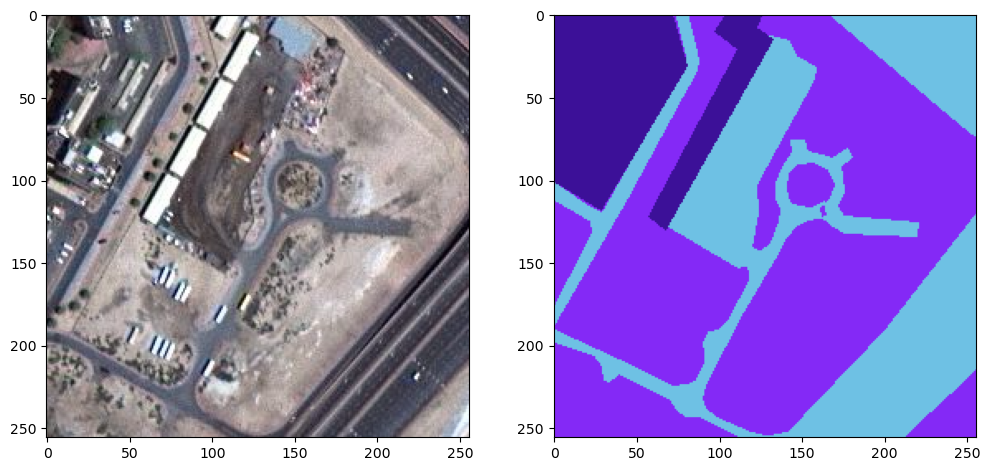

In [15]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()

# hexadecimal values 

0 to 9 = 0 to 9 ;
10 to 15 = A to F

There are 6 classes/labels in this semantic segmentation problem. For this 6 classes/labels, we need to convert the given HEX decimal code into RGB

# Calculate the HEX code into RGB values 

In [16]:
building = '#3C1098'.lstrip('#')

building = np.array(tuple(int(building[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of building: ", building)

The RGB value of building:  [ 60  16 152]


In [17]:
land =  '#8429F6'.lstrip('#')

land = np.array(tuple(int(land[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of land: ", land)

The RGB value of land:  [132  41 246]


In [18]:
Road = '#6EC1E4'.lstrip('#')

Road = np.array(tuple(int(Road[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of Road: ", Road)

The RGB value of Road:  [110 193 228]


In [19]:
Vegetation = '#FEDD3A'.lstrip('#')

Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of vegetation: ", Vegetation)

The RGB value of vegetation:  [254 221  58]


In [20]:
Water = '#E2A929'.lstrip('#')

Water = np.array(tuple(int(Water[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of Water: ", Water)

The RGB value of Water:  [226 169  41]


In [21]:
Unlabeled = '#9B9B9B'.lstrip('#')

Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of Unlabeled: ", Unlabeled)

The RGB value of Unlabeled:  [155 155 155]


In [22]:
#Assinging the list of mask patches to a variable and performing integer encoding for each class

label = single_mask_patch

def rgb_to_2D_labels(label):
    label_for_classes = np.zeros(label.shape, dtype = np.uint8)
    label_for_classes[np.all(label == building, axis = -1)] = 0
    label_for_classes[np.all(label == land, axis = -1)] = 1
    label_for_classes[np.all(label == Road, axis = -1)] = 2
    label_for_classes[np.all(label == Vegetation, axis = -1)] = 3
    label_for_classes[np.all(label == Water, axis = -1)] = 4
    label_for_classes[np.all(label == Unlabeled, axis = -1)] = 5
    
    label_for_classes = label_for_classes[:, :, 0]
    
    return label_for_classes

In [23]:
len(mask_dataset)

1305

In [24]:
#update the new labels to the mask dataset 

labels = []

for i in range(len(mask_dataset)):
    label = rgb_to_2D_labels(mask_dataset[i])
    labels.append(label)
    
labels = np.array(labels)
labels = np.expand_dims(labels, axis = 3)

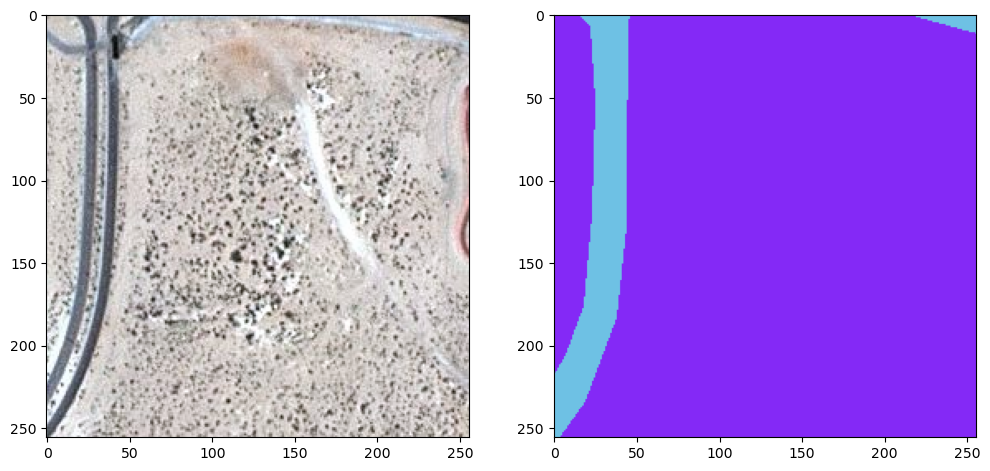

In [25]:
#Sanity check to find the unique labels in the dataset
np.unique(labels)


import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()

In [26]:
# Convert the integer encoded values to one-hot encoded values 

n_classes = len(np.unique(labels))

from keras.utils import to_categorical
labels_categorical = to_categorical(labels, num_classes = n_classes)

In [28]:
from sklearn.model_selection import train_test_split

X_train, Y_train, X_test, Y_test = train_test_split(image_dataset, labels_categorical, 
                                                               test_size=0.20, random_state=42)